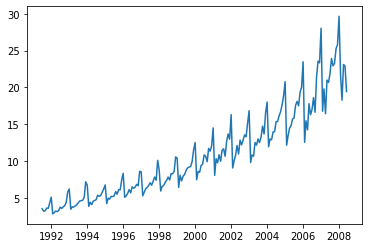

In [1]:
"""
Time Series Analysis in Python
"""
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dateutil.parser import parse
#Time.csv contains the monthly diabetic medication sale in australia
df =  pd.read_csv('time.csv',parse_dates=['date'])
df.head()
plt.plot(df.date,df.value)
plt.show()

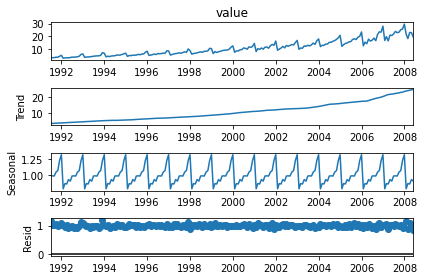

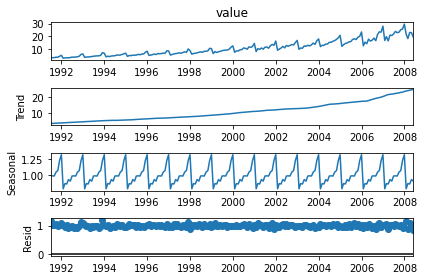

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
df =  pd.read_csv('time.csv',parse_dates=['date'],index_col='date')
mul = seasonal_decompose(df['value'],model='multiplicative',extrapolate_trend='freq')
#Value = Trend * Seasonal * Residual
mul.plot()

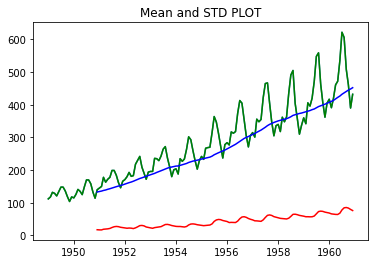

In [3]:
from datetime import datetime
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
#Using AriPassenger.csv
#Plotting the Statistics
df = pd.read_csv("AirPassengers.csv")
df['Month']= pd.to_datetime(df['Month'],infer_datetime_format=True)
df_indexed = df.set_index(['Month'])
df_indexed.head()
plt.plot(df_indexed)
rolling_mean = df_indexed.rolling(window=24).mean()
rolling_std = df_indexed.rolling(window=24).std()
orig = plt.plot(df_indexed,color='green', label='Original')
mean = plt.plot(rolling_mean,color='blue', label='Mean')
dev = plt.plot(rolling_std,color='red', label='STD')
plt.title("Mean and STD PLOT")
plt.show(block=False)




In [4]:
# Augumented Dickey Fuller Test
dftest = adfuller(df_indexed['#Passengers'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Stat','p-value','#LAGS','Number of Observations'])
for key,value in dftest[4].items():
    dfoutput["CV (%s)"%key]= value
print(dfoutput)

Test Stat                   0.815369
p-value                     0.991880
#LAGS                      13.000000
Number of Observations    130.000000
CV (1%)                    -3.481682
CV (5%)                    -2.884042
CV (10%)                   -2.578770
dtype: float64


Test Stat                  -2.717131
p-value                     0.071121
#LAGS                      14.000000
Number of Observations    128.000000
CV (1%)                    -3.482501
CV (5%)                    -2.884398
CV (10%)                   -2.578960
dtype: float64


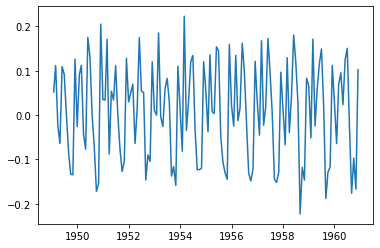

In [5]:
df_indexed_log = np.log(df_indexed)
df_indexed_log_diff = df_indexed_log - df_indexed_log.shift()
plt.plot(df_indexed_log_diff)

df_indexed_log_diff.dropna(inplace=True)
df_indexed_log_diff.head()
dftest = adfuller(df_indexed_log_diff['#Passengers'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Stat','p-value','#LAGS','Number of Observations'])
for key,value in dftest[4].items():
    dfoutput["CV (%s)"%key]= value
print(dfoutput)